<a href="https://colab.research.google.com/github/PoojaS1D/Amazon-Reviews-Text-Summarizatio/blob/main/Text_Summarization_of_Amazon_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Amazon Reviews Text Summarization - Internship 2020***

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
  
print('Found GPU at: {}'.format(device_name))   

Found GPU at: /device:GPU:0


***Extract Data from zip file***

In [ ]:
from zipfile import ZipFile
file_name="/content/drive/My Drive/Amazon/AmazonDataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")
  

done


In [ ]:
import bz2
import pandas as pd
import re 
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_file = bz2.BZ2File('train.ft.txt.bz2')
test_file = bz2.BZ2File('test.ft.txt.bz2')

In [ ]:
#Read Data from text file
train_file = train_file.readlines()
test_file = test_file.readlines()


In [ ]:
print("Number of training reivews: " + str(len(train_file)))
print("Number of test reviews: " + str(len(test_file)))

Number of training reivews: 3600000
Number of test reviews: 400000


In [ ]:
num_train =100000 #use 100000 Data for training 
num_test = 20000  #use 20000 data for testing

train_file = [x.decode('utf-8') for x in train_file[:num_train]]
test_file = [x.decode('utf-8') for x in test_file[:num_test]]

In [ ]:
 print(train_file[0])

__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^



In [ ]:
#Extract label and reviews from training Data
train_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in train_file]
train_sentences = [x.split(' ', 1)[1][:-1].lower() for x in train_file]

In [ ]:
train_sentences[0]

'stuning even for the non-gamer: this sound track was beautiful! it paints the senery in your mind so well i would recomend it even to people who hate vid. game music! i have played the game chrono cross but out of all of the games i have ever played it has the best music! it backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. it would impress anyone who cares to listen! ^_^'

In [ ]:
#Extract label and reviews from testing Data
test_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in test_file]
test_sentences = [x.split(' ', 1)[1][:-1].lower() for x in test_file]

In [ ]:
#Create Data frame
train = pd.DataFrame({'text':train_sentences,'label':train_labels})
test=pd.DataFrame({'text':test_sentences,'label':test_labels})

In [ ]:
train.head()

,text,label
0,stuning even for the non-gamer: this sound tra...,1
1,the best soundtrack ever to anything.: i'm rea...,1
2,amazing!: this soundtrack is my favorite music...,1
3,excellent soundtrack: i truly like this soundt...,1
4,"remember, pull your jaw off the floor after he...",1


In [ ]:
test.head()

,text,label
0,great cd: my lovely pat has one of the great v...,1
1,one of the best game music soundtracks - for a...,1
2,batteries died within a year ...: i bought thi...,0
3,"works fine, but maha energy is better: check o...",1
4,great for the non-audiophile: reviewed quite a...,1


In [ ]:
train['text'][0]

'stuning even for the non-gamer: this sound track was beautiful! it paints the senery in your mind so well i would recomend it even to people who hate vid. game music! i have played the game chrono cross but out of all of the games i have ever played it has the best music! it backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. it would impress anyone who cares to listen! ^_^'

In [ ]:
test['text'][0]

'great cd: my lovely pat has one of the great voices of her generation. i have listened to this cd for years and i still love it. when i\'m in a good mood it makes me feel better. a bad mood just evaporates like sugar in the rain. this cd just oozes life. vocals are jusat stuunning and lyrics just kill. one of life\'s hidden gems. this is a desert isle cd in my book. why she never made it big is just beyond me. everytime i play this, no matter black, white, young, old, male, female everybody says one thing "who was that singing ?"'

In [ ]:
train.describe()

,label
count,100000.000000
mean,0.512670
std,0.499842
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
train['number_of_words'] = train['text'].str.lower().str.split().apply(len)
train.head()

,text,label,number_of_words
0,stuning even for the non-gamer: this sound tra...,1,80
1,the best soundtrack ever to anything.: i'm rea...,1,97
2,amazing!: this soundtrack is my favorite music...,1,129
3,excellent soundtrack: i truly like this soundt...,1,118
4,"remember, pull your jaw off the floor after he...",1,87


In [ ]:
test['number_of_words'] = test['text'].str.lower().str.split().apply(len)
test.head()

,text,label,number_of_words
0,great cd: my lovely pat has one of the great v...,1,106
1,one of the best game music soundtracks - for a...,1,148
2,batteries died within a year ...: i bought thi...,0,60
3,"works fine, but maha energy is better: check o...",1,37
4,great for the non-audiophile: reviewed quite a...,1,69


***Data Visulaization***

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


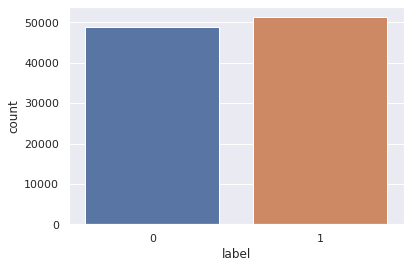

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x="label", data=train)

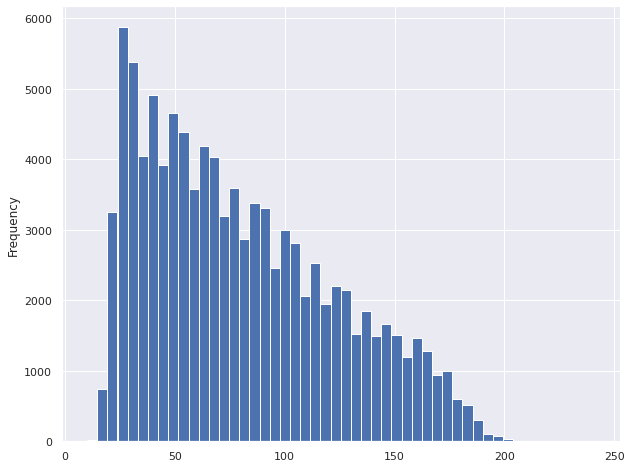

In [ ]:
train['number_of_words'].plot(bins=50, kind='hist',figsize = (10,8)) 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f63405e5a58>,
      dtype=object)

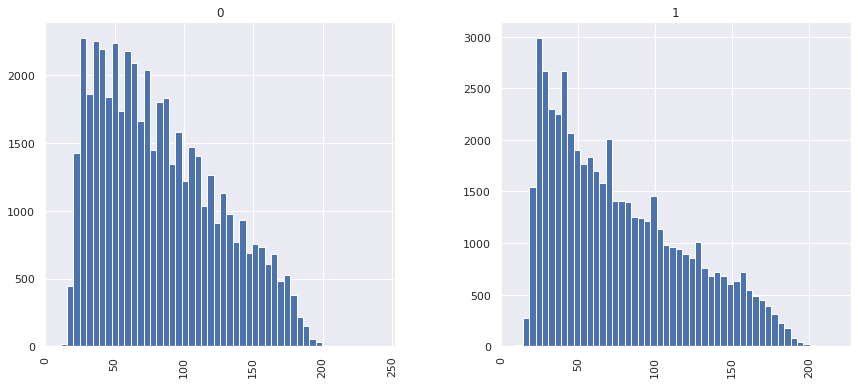

In [ ]:
train.hist(column='number_of_words', by='label',
           bins=50,figsize=(14,6))

***Data Preprocessing***

In [ ]:
import re 
import nltk

#Remove url 
def remove_url(text):
     url=re.compile(r"https?://\S+|www\.\S+")
     return url.sub(r" ",text)

# Remove Html
def remove_html(text):
  cleanr = re.compile('<.*?>')
  return cleanr.sub(r" ",text)

#Remove Number 
def remove_num(texts):
   output = re.sub(r'\d+', '', texts)
   return output

# Remove Punctuation

import string
def remove_punc(text):
   table=str.maketrans(' ',' ',string.punctuation)
   return text.translate(table)

#Remove Stopwords

nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words("english"))
 
def remove_stopword(text):
   text=[word.lower() for word in text.split() if word.lower() not in stop]
   return " ".join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train['text']=train.text.map(lambda x:remove_url(x))
train['text']=train.text.map(lambda x:remove_html(x))
train['text']=train.text.map(lambda x:remove_punc(x))
train['text']=train['text'].map(remove_num)
train['text']=train['text'].map(remove_stopword)

In [ ]:
train['text'][0]

'stuning even nongamer sound track beautiful paints senery mind well would recomend even people hate vid game music played game chrono cross games ever played best music backs away crude keyboarding takes fresher step grate guitars soulful orchestras would impress anyone cares listen'

In [ ]:
test['text']=test.text.map(lambda x:remove_url(x))
test['text']=test.text.map(lambda x:remove_html(x))
test['text']=test.text.map(lambda x:remove_punc(x))
test['text']=test['text'].map(remove_num)
test['text']=test['text'].map(remove_stopword)

In [ ]:
test['text'][0]

'great cd lovely pat one great voices generation listened cd years still love im good mood makes feel better bad mood evaporates like sugar rain cd oozes life vocals jusat stuunning lyrics kill one lifes hidden gems desert isle cd book never made big beyond everytime play matter black white young old male female everybody says one thing singing'

In [ ]:

#Stemming

import nltk
nltk.download('punkt')
def Stemming(text):
   stem=[]
   from nltk.corpus import stopwords
   from nltk.stem import SnowballStemmer
  #is based on The Porter Stemming Algorithm
   stopword = stopwords.words('english')
   snowball_stemmer = SnowballStemmer('english')
   word_tokens = nltk.word_tokenize(text)
   stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
   stem=' '.join(stemmed_word)
   return stem

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:

train['text']=train['text'].map(Stemming)

In [ ]:
train['text'][0]

'stune even nongam sound track beauti paint seneri mind well would recomend even peopl hate vid game music play game chrono cross game ever play best music back away crude keyboard take fresher step grate guitar soul orchestra would impress anyon care listen'

In [ ]:

test['text']=test['text'].map(Stemming)

In [ ]:
test['text'][0]

'great cd love pat one great voic generat listen cd year still love im good mood make feel better bad mood evapor like sugar rain cd ooz life vocal jusat stuun lyric kill one life hidden gem desert isl cd book never made big beyond everytim play matter black white young old male femal everybodi say one thing sing'

# ***Word Embedding***

In [ ]:
vocab_size=12000
embedding_dim=64
max_length=100
trunc_type="post"
oov_tok="<OOV>"
padding_type="post"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train['text'])

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(train['text'])
training_padded = pad_sequences(training_sequences, maxlen=max_length ,padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(test['text'])
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
print(word_index)

{'<OOV>': 1, 'book': 2, 'one': 3, 'movi': 4, 'like': 5, 'read': 6, 'great': 7, 'good': 8, 'time': 9, 'get': 10, 'would': 11, 'love': 12, 'use': 13, 'work': 14, 'dont': 15, 'realli': 16, 'make': 17, 'stori': 18, 'first': 19, 'even': 20, 'much': 21, 'well': 22, 'buy': 23, 'look': 24, 'best': 25, 'want': 26, 'film': 27, 'think': 28, 'year': 29, 'album': 30, 'go': 31, 'better': 32, 'product': 33, 'see': 34, 'way': 35, 'song': 36, 'cd': 37, 'could': 38, 'know': 39, 'also': 40, 'charact': 41, 'thing': 42, 'music': 43, 'mani': 44, 'say': 45, 'tri': 46, 'littl': 47, 'watch': 48, 'review': 49, 'new': 50, 'ever': 51, 'im': 52, 'bad': 53, 'recommend': 54, 'never': 55, 'end': 56, 'peopl': 57, 'enjoy': 58, 'bought': 59, 'back': 60, 'still': 61, 'made': 62, 'dvd': 63, 'give': 64, 'find': 65, 'need': 66, 'play': 67, 'got': 68, 'two': 69, 'disappoint': 70, 'old': 71, 'take': 72, 'didnt': 73, 'sound': 74, 'money': 75, 'come': 76, 'seem': 77, 'ive': 78, 'interest': 79, 'star': 80, 'put': 81, 'day': 82, 

In [ ]:
training_padded[1]

array([  25,  805,   51,  181,   52,    6,   86,   49,   45,   25,  113,
        805,  483,  309,  101,   49, 2068,  161,    1,    1,    1, 1069,
        735,   43, 1571,   52,  111,   29,  173,  315, 1829,    1,  132,
       2734,  160, 7108,  112,   45,   31,   23,   37,   21,   75,    3,
         90,   11,  100,   93, 2076,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [ ]:
training_sequences[1]

[25,
 805,
 51,
 181,
 52,
 6,
 86,
 49,
 45,
 25,
 113,
 805,
 483,
 309,
 101,
 49,
 2068,
 161,
 1,
 1,
 1,
 1069,
 735,
 43,
 1571,
 52,
 111,
 29,
 173,
 315,
 1829,
 1,
 132,
 2734,
 160,
 7108,
 112,
 45,
 31,
 23,
 37,
 21,
 75,
 3,
 90,
 11,
 100,
 93,
 2076]

# ***BiDirectional LSTM MODEL***

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM,GRU
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score    
from tensorflow.python.keras import models, layers, optimizers   
from keras.layers import  SpatialDropout1D
from keras.layers.wrappers import Bidirectional
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping

In [ ]:




model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(256, dropout=0.2)))

model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 64)           768000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 100, 64)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 512)               657408    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 1,425,921
Trainable params: 1,425,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
adam=Adam(lr=0.0001)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'] )

In [ ]:
num_epochs=15

history= model.fit(training_padded,train['label'],epochs=num_epochs,callbacks = [EarlyStopping(monitor='val_accuracy', patience=2)],validation_data=(testing_padded,test['label']),batch_size=128,verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 100000 samples, validate on 20000 samples
Epoch 1/15
100000/100000 [==============================] - 285s 3ms/step - loss: 0.4669 - accuracy: 0.7685 - val_loss: 0.3349 - val_accuracy: 0.8600
Epoch 2/15
100000/100000 [==============================] - 289s 3ms/step - loss: 0.3092 - accuracy: 0.8720 - val_loss: 0.2989 - val_accuracy: 0.8745
Epoch 3/15
100000/100000 [==============================] - 283s 3ms/step - loss: 0.2727 - accuracy: 0.8881 - val_loss: 0.2817 - val_accuracy: 0.8809
Epoch 4/15
100000/100000 [==============================] - 280s 3ms/step - loss: 0.2535 - accuracy: 0.8971 - val_loss: 0.2813 - val_accuracy: 0.8830
Epoch 5/15
100000/100000 [==============================] - 282s 3ms/step - loss: 0.2421 - accuracy: 0.9025 - val_loss: 0.2753 - val_accuracy: 0.8845
Epoch 6/15
100000/100000 [==============================] - 281s 3ms/step - loss: 0.2339 - accuracy: 0.9067 - val_loss: 0.2820 - val_accuracy: 0.8852
Epoch 7/15
100000/100000 [=======================

**Visulaization of Accuracy and Loss** 

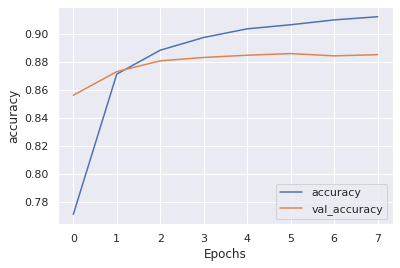

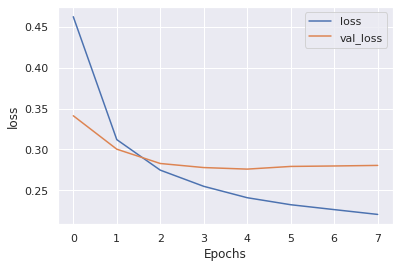

In [ ]:
 import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
# Predicting the Test set results
y_pred = model.predict(testing_padded)
y_pred = (y_pred > 0.5)
X_test=testing_padded
y_test=test['label']

NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix


In [ ]:

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
 
# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Accuracy: 0.884300
Precision: 0.877413
Recall: 0.899060
F1 score: 0.888104
ROC AUC: 0.883977
[[8503 1283]
 [1031 9183]]


Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.87      0.88      9786
           1       0.88      0.90      0.89     10214

    accuracy                           0.88     20000
   macro avg       0.88      0.88      0.88     20000
weighted avg       0.88      0.88      0.88     20000



Confusion Matrix

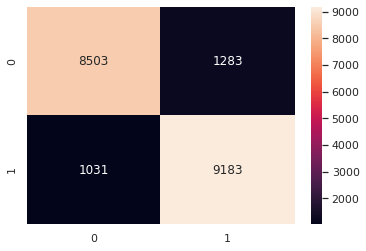

In [ ]:
import seaborn as sns
sns.heatmap(matrix,annot=True,fmt='')

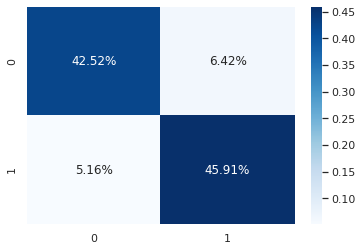

In [ ]:
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.heatmap(matrix/np.sum(matrix), annot=True, 
            fmt='.2%', cmap='Blues')

**ROC Curve**

In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

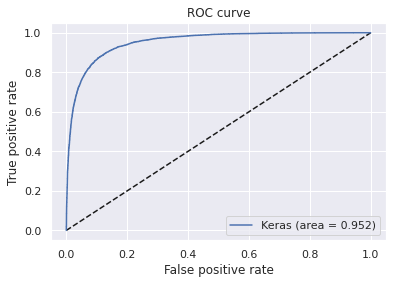

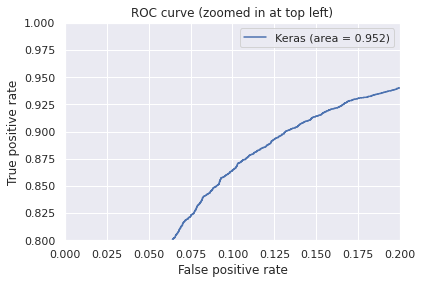

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

**Function to predict the rating of Review**

In [ ]:
def Review(sentence):
   sequences = tokenizer.texts_to_sequences(sentence)
   padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

   prob=model.predict(padded)
   if prob>=0.8:
     print(5)
   elif prob>=0.6:
     print(4)
   elif prob>=0.4:
     print(3) 
   elif prob>=0.2:
     print(2)   
   else:
       print(1)

In [ ]:
sentence=['Good product exact fit in size']
Review(sentence)

5


In [ ]:
sentence=['Good Product but not fit  in size']
Review(sentence)

3


In [ ]:
sentence=['sound is not so good ']
Review(sentence)

2


In [ ]:
sentence=['this is worst thing donot buy it']
Review(sentence)

1


In [ ]:
sentence=["DO NOT BUY. Quality is too bad. MRP shows @2400. To attract the product they use the brand name and give heavy discounts. I purchased it @550. Material quality is very poor. Size is moderately large.Don't go through the picture as shown. I have uploaded the pictures of the same. I brought the black, cement & blue. Go through the actual pictures"]
Review(sentence)

1
